# Local Minima for a function of Two Variables Using Optimality Conditions

Find a local minimum point for the funtion:
$$ f(x) = x_1 + \frac{(4\times 10^6)}{x_1 x_2} + 250x_2$$

See reference for details.

## Solution

In [2]:
import sympy as sp
import numpy as np
from scipy import linalg
from symopt import DiffNotation

In [3]:
x1, x2 = sp.symbols(['x1', 'x2'])

In [5]:
fx = x1 + (4*10**6) / (x1*x2) + 250*x2
fx

x1 + 250*x2 + 4000000/(x1*x2)

In [7]:
# Necessary conditions
d1 = DiffNotation(fx, x1, x2)
grad_f = d1.gradient()
grad_f

Matrix([
[  1 - 4000000/(x1**2*x2)],
[250 - 4000000/(x1*x2**2)]])

In [9]:
# The solution of the system gives the stationary points of the function
sp.nonlinsolve(grad_f, (x1, x2))

{(1000, 4), (-500 - 500*sqrt(3)*I, -2 - 2*sqrt(3)*I), (-500 + 500*sqrt(3)*I, -2 + 2*sqrt(3)*I)}

In [10]:
# The Hessian of fx is a suficient condition of minimum if it is defined positive
hess_f = d1.hessian()
hess_f

Matrix([
[   8000000/(x1**3*x2), 4000000/(x1**2*x2**2)],
[4000000/(x1**2*x2**2),    8000000/(x1*x2**3)]])

In [12]:
# we check the eigenvalues of the hessian at the stationary point (1000, 4)
hess_f_values = np.array(
    hess_f.subs(x1, 1000).subs(x2, 4),
    dtype=float
)
linalg.eig(hess_f_values)

(array([1.499994e-03+0.j, 1.250005e+02+0.j]),
 array([[-0.999998  , -0.00200002],
        [ 0.00200002, -0.999998  ]]))

Eigenvalues positive implies that (1000, 4) is a point of minimum

## Contour plot

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab

%matplotlib notebook

In [67]:
# Contornos
x1_arr = np.linspace(500, 3000, 1000)
x2_arr = np.linspace(2, 14, 1000)
x1_mesh, x2_mesh = np.meshgrid(x1_arr, x2_arr)
fx_mesh = [[x1_ + (4*10**6) / (x1_*x2_) + 250*x2_ 
           for x1_ in x1_arr] 
          for x2_ in x2_arr]
fx_mesh = np.array(fx_mesh)

<IPython.core.display.Javascript object>


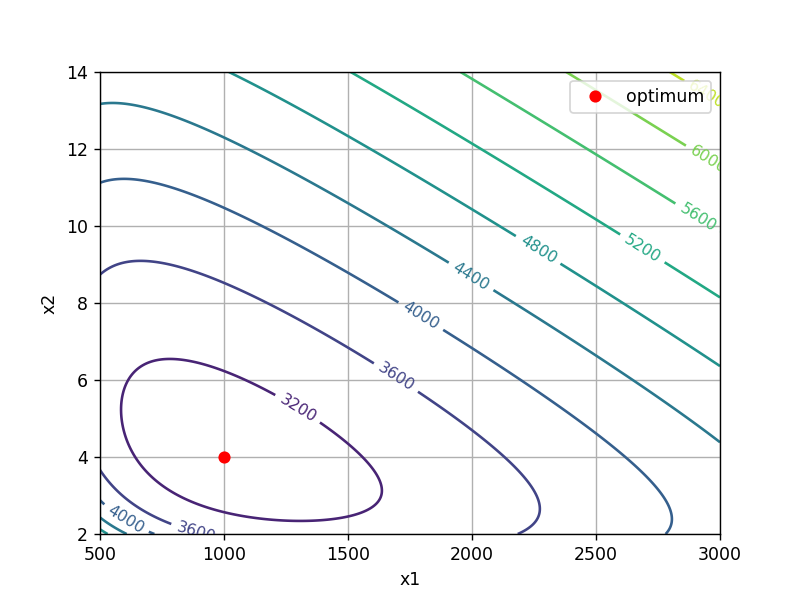

In [73]:
plt.figure()
CS1 = plt.contour(x1_mesh, x2_mesh, fx_mesh, 10)
plt.clabel(CS1, fontsize=9, inline=1)
origin = (1000, 4)
CS2 = plt.plot(*origin, 'ro',label='optimum')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()
#https://matplotlib.org/2.0.2/examples/pylab_examples/contour_demo.html
#https://www.tutorialspoint.com/how-to-plot-vectors-in-python-using-matplotlib

In [72]:
# The minimum is
fx.subs(x1, 1000).subs(x2, 4)

3000

Reference
========
[1] ARORA, Jasbir S. Introduction to Optimum Design. Elservie. 2nd ed. Example 4.23 from page 115.